In [1]:
%pylab inline
%matplotlib notebook

import pandas

Populating the interactive namespace from numpy and matplotlib


<hr/>

## Verify the results

We verify the results by making sure that we get the expect error behavior and convergence rates.

Load the results into a Numpy array and create arrays from the columns.

In [7]:
# TODO : Run this code for processor counts [1,2,4,8,16]

file_prefix = 'trap_'
nprocs = 1   # set to 1,2,4, and 8
filename = file_prefix + '{:02d}'.format(nprocs) + '.out'

In [8]:
# Read text file into numpy array
T = loadtxt(filename)

# Convert slices to column arrays
Nvec = T[:,0].astype('int')
soln = T[:,1]
err  = T[:,2]
t    = T[:,3]

## Plot accuracy results

<IPython.core.display.Javascript object>


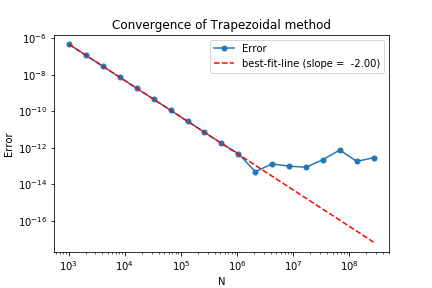

In [9]:
loglog(Nvec,err,'.-',markersize=10)
xlabel('N')
ylabel('Error')
title('Convergence of Trapezoidal method');

c = polyfit(log(Nvec[:-9]),log(err[:-9]),1)
loglog(Nvec,exp(polyval(c,log(Nvec))),'r--')
legend(["Error","best-fit-line (slope = {:6.2f})".format(c[0])])

<hr/>

## Show results in a table

Create and print a Pandas table displaying results. We will add a column containing the convergence rate.

To compute the convergence rate, we assume that the error in our trapezoidal rule is given as a function of $h = (b-a)/N$.  

\begin{equation}
e(h) \sim Ch^r
\end{equation}

For a second order method, we expect the convergence rate $r$ to satisfy $r \sim 2$.  To numerically estimate $r$, we further assume that $e_i$ is the error computed using a mesh width $h$ and $e_{i+1}$ is the error on mesh width $h/2$.  Furthermore, for small $h$, we assume that the constant $C$ is independent of $h$.   Then, 
\begin{equation}
\frac{e_{i}}{e_{i+1}} = \frac{C h^r}{C(h/2)^r} \sim 2^r
\end{equation}

We can then compute the numerical converence rate $r_i$ as
\begin{equation}
r_i = \log_2\left(\frac{e_{i}}{e_{i+1}}\right)
\end{equation}
for errors $e_i$.  

In [5]:
df = pandas.DataFrame({'N' : Nvec, 'soln' : soln, 'err' : err, 't' : t})

rate = log2(err[:-1]/err[1:]).reshape(-1,1)
df['rate'] = vstack((numpy.nan,rate))         # Add a Nan as the first item

In [10]:
# Re-label column headers
di = {'soln' : 'Solution', 'err' : 'Error','rate' : 'Rate','t' : 'Time (s)'}

# Format string
fstr = {'N' : '{:d}'.format, di['soln'] : '{:.16f}'.format,
        di['err'] : '{:.4e}'.format, di['rate'] : '{:.2f}'.format,
        di['t'] : '{:.2e}'.format} # Width has no effect

# Set up properties for the table
pr = df.rename(columns=di).style
pr.format(fstr)

pr.set_properties(subset= 'N',      width='60px')          
pr.set_properties(subset=di['soln'],width='120px')
pr.set_properties(subset=di['err'], width='110px')
pr.set_properties(subset=di['t'], width='110px')
pr.set_properties(subset=di['rate'],width='80px')

exact_soln = .8725929572658386    # Copied from output
pr.set_caption("True solution is {:20.16f};  Simulation run on {:d} processors\n".format(exact_soln,nprocs))

,N,Error,Solution,Time (s),Rate
0,1024,4.6778e-07,1.8725924894828205,6.36e-02,nan
1,2048,1.1695e-07,1.8725928403201060,6.44e-02,2.00
2,4096,2.9236e-08,1.8725929280294076,6.37e-02,2.00
3,8192,7.3091e-09,1.8725929499567309,6.35e-02,2.00
4,16384,1.8273e-09,1.8725929554385612,6.86e-02,2.00
5,32768,4.5682e-10,1.8725929568090220,6.42e-02,2.00
6,65536,1.1421e-10,1.8725929571516300,6.45e-02,2.00
7,131072,2.8554e-11,1.8725929572372844,6.46e-02,2.00
8,262144,7.1316e-12,1.8725929572587070,6.50e-02,2.00
9,524288,1.7850e-12,1.8725929572640536,6.60e-02,2.00
